<h1><center></h1></center><h1><center>Text Classification (Amazon Book Reviews)</h1></center>

<b>Author: </b>

<b>Guryash Singh Dhall</b>  


## SUB SAMPLING OF THE MAIN DATASET


We are using the "Books_5.json" dataset for this project. Since the dataset is too large, we are sampling the data by iterating over the file. Each line in the file is a JSON with the information about the book review. We have used the following algorithm to randomly sample the information.
1. Set the required sample variable to 1 million.
2. Open the file.
3. Initialize the line variable "i" to 0, initialize the samples variable "samples" to 0.
4. Initialize the next line variable "next" to a random number between 1 and 20.
5. Loop over the file.
6. Read the new line.
7. Check if the line number "i" matches the "next" value.
8. If step 7 is false, then go to step 6.
9. If step 7 is true, then deserialize the JSON text into a dictionary.
10. Append the dictionary to the data list. Increment the samples variable.
11. Set the next variable to a random number between current line number + 4 to current line number + 20.
12. Check if the samples match the required samples. If yes, then break from the loop. Else, continue.
13. Increment the line number variable.



In [ ]:
import linecache
import random
import json

def loadData():
    data = []
    try:
        required_samples = 1000000 ### TAKING 1 MILLION SAMPLES
        samples = 0
        with open("Books_5.json", 'r') as f:
            i = 0
            next = random.randint(1, 20)
            for jsonData in f:

                if i == next:
                    js = json.loads(jsonData)
                    style = js.get('style', None)

                    if style:
                      js['style'] = js['style'].get('Format:', None)
                    else:
                      js['style'] = None

                    data.append(js)
                    samples += 1
                    next = random.randint(i + 4, i + 20)

                if samples == required_samples:
                    break

                i += 1

        return data
    except ValueError as err:
        return data

Apply the function above to get dataset with 1 million records

In [ ]:
data =loadData()

In [ ]:
df = pd.DataFrame(data)

# 1. Data Understanding


The majority of the features in the dataset are textual data,
for which a general data quality report doesn’t provide a lot of insights. Therefore, for the
purpose of building a data quality report, we will substitute the actual text items with their
properties such as:
* Text length (i.e., the number of characters).
* The number of words.
* Presence of non-alphanumeric characters.
* Any additional properties that you find useful in understanding text.

Adding the below snippet to avoid future warnings in the result snippets

In [ ]:
# import warnings filter
from warnings import simplefilter
import warnings
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 

Updating version of matplotlib to accomated axis labels used in this python notebook


In [ ]:
# !pip install matplotlib==3.4

Printing first 5 rows

In [ ]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,3,False,"09 21, 2005",A1SDAYRVRR62ZH,0001713353,Paperback,M3 Pete,"To summarize the story, it's all about trying ...",A moral tale kids will enjoy long before they ...,1127260800,NaN
1,5.0,NaN,False,"01 7, 2016",A6EQG0P75KHJ,0001061240,None,Bookworm 93103,"I agree with another reviewer, that every home...","Enchanting poetry and illustrations, a true cl...",1452124800,NaN
2,5.0,2,True,"08 27, 2013",A2C81B811FA56V,0001061240,Hardcover,Helen D. Setterfield,"One of my daughters, growing up, also loved th...",great to have a replacement for a favorite book,1377561600,NaN
3,5.0,NaN,True,"09 27, 2016",A1UFGV0WEC7VW0,0001712799,Library Binding,LiveOutLoud,"""U"" is for UP! Great book",Great,1474934400,NaN
4,5.0,NaN,True,"12 11, 2014",A12Q7B7NT716RV,0001712799,Hardcover,True Value Girl,Love it,Five Stars,1418256000,NaN


Data Description via describe and info

In [ ]:
df.describe()

,overall,unixReviewTime
count,1000000.000000,1.000000e+06
mean,4.340325,1.377295e+09
std,1.027564,1.142281e+08
min,1.000000,8.430048e+08
25%,4.000000,1.356134e+09
50%,5.000000,1.406678e+09
75%,5.000000,1.448323e+09
max,5.000000,1.525738e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         1000000 non-null  float64
 1   vote            226014 non-null   object 
 2   verified        1000000 non-null  bool   
 3   reviewTime      1000000 non-null  object 
 4   reviewerID      1000000 non-null  object 
 5   asin            1000000 non-null  object 
 6   style           990383 non-null   object 
 7   reviewerName    999968 non-null   object 
 8   reviewText      999891 non-null   object 
 9   summary         999873 non-null   object 
 10  unixReviewTime  1000000 non-null  int64  
 11  image           1520 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 84.9+ MB


Converting the datatypes of all features

In [ ]:
df_report = df.convert_dtypes()
df_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         1000000 non-null  Int64  
 1   vote            226014 non-null   string 
 2   verified        1000000 non-null  boolean
 3   reviewTime      1000000 non-null  string 
 4   reviewerID      1000000 non-null  string 
 5   asin            1000000 non-null  string 
 6   style           990383 non-null   string 
 7   reviewerName    999968 non-null   string 
 8   reviewText      999891 non-null   string 
 9   summary         999873 non-null   string 
 10  unixReviewTime  1000000 non-null  Int64  
 11  image           1520 non-null     object 
dtypes: Int64(2), boolean(1), object(1), string(8)
memory usage: 87.7+ MB


Checking Null values in all features

In [ ]:
df.isna().sum()

overall                0
vote              773986
verified               0
reviewTime             0
reviewerID             0
asin                   0
style               9617
reviewerName          32
reviewText           109
summary              127
unixReviewTime         0
image             998480
dtype: int64

## 1.1 Build the data quality report.

### Continous features report

Continuous features report includes:
1. Min
2. 1st quartile
3. Mean
4. 2nd quartile - Median
5. 3rd quartile
6. Max
7. Standard deviation
8. Total num of instances
9. % missing values
10. Cardinality - num of distinct values for a feature

Using Pandas provides a function for generating data quality reports however it doesn't include all the statistics.

In [ ]:
df_report.describe(include=['number'])

,overall,verified,unixReviewTime
count,1000000.000000,1000000,1.000000e+06
unique,NaN,2,NaN
top,NaN,True,NaN
freq,NaN,678143,NaN
mean,4.340325,NaN,1.377295e+09
std,1.027564,NaN,1.142281e+08
min,1.000000,NaN,8.430048e+08
25%,4.000000,NaN,1.356134e+09
50%,5.000000,NaN,1.406678e+09
75%,5.000000,NaN,1.448323e+09


In [ ]:
import warnings
def build_continuous_features_report(dataframe):
    
    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = dataframe.select_dtypes("number").columns
    continuous_data_df = dataframe[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [ ]:
build_continuous_features_report(df_report)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
overall,1000000,0.0,5,1,4,4.340325e+00,5.000000e+00,5,5,1.027564e+00
verified,1000000,0.0,2,False,0,6.781430e-01,1.000000e+00,1,True,4.671887e-01
unixReviewTime,1000000,0.0,7525,843004800,1356134400,1.377295e+09,1.406678e+09,1448323200,1525737600,1.142281e+08


### Categorical features report

Categorical features report includes:
1. Mode - the most frequent value
2. 2nd mode - the second most frequent value
3. Frequency of mode
4. Proportion of mode in the dataset
5. Frequency of 2nd mode
6. Proportion of 2nd mode in the dataset
7. % missing values
8. Cardinality

Pandas provides a function for generating data quality reports however it doesn't include all the statistics.

In [ ]:
df_cat=df_report.drop(['image'],axis =1)

In [ ]:
df_cat.describe(exclude=['number'])

,vote,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary
count,226014,1000000,1000000,1000000,990383,999968,999891,999873
unique,537,7525,607732,171406,76,439603,953666,638382
top,2,"02 20, 2015",A2F6N60Z96CAJI,038568231X,Kindle Edition,Amazon Customer,great,Five Stars
freq,63856,1849,544,2388,487121,44765,1146,93367


In [ ]:
def build_categorical_features_report(dataframe):

    """Build tabular report for categorical features"""

    def _mode(df):
        return df.apply(lambda ft: ft.mode().to_list()).T

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list()).T

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    cat_feat_names = dataframe.select_dtypes(exclude="number").columns
    continuous_data_df = dataframe[cat_feat_names]

    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df


In [ ]:
build_categorical_features_report(df_cat)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
vote,1000000,77.3986,537,2,63856,6.3856,3,35920,3.5920
reviewTime,1000000,0.0000,7525,"02 20, 2015",1849,0.1849,"10 7, 2015",1230,0.1230
reviewerID,1000000,0.0000,607732,A2F6N60Z96CAJI,544,0.0544,AHUT55E980RDR,284,0.0284
asin,1000000,0.0000,171406,038568231X,2388,0.2388,0297859382,1845,0.1845
style,1000000,0.9617,76,Kindle Edition,487121,48.7121,Paperback,242648,24.2648
reviewerName,1000000,0.0032,439603,Amazon Customer,44765,4.4765,Kindle Customer,25046,2.5046
reviewText,1000000,0.0109,953666,great,1146,0.1146,Great,1125,0.1125
summary,1000000,0.0127,638382,Five Stars,93367,9.3367,Four Stars,22741,2.2741


## 1.2 Identifying Data Quality Issues and Building a Data Quality Plan

The following data quality issues were identified 


1.   Feature 'Style' which denotes the type of platform was in the form of nested json. This cannnot be used directly for analysis. We need to clean it to use it for analysis
2. The fetaure 'image' has maximum number of null values and the value which are present are in the form of links, which cannnot be consumed directly. We need to preprocess it so that it can provide some value in the analysis
3. The textual features such as Reviever Name ,Summary, Review Text and Style has Null Values. Null value treatment needs to be performed on the same
4. The continous features such as Vote, and verified have some NULL values. Null value treatment needs to be performed on the same
5. The textual features which would be of major use in the model i.e summary and review text have stop words, alpha numeric characters and are in combnation of upper and lower case. Specific treatement needs to be done on them to make it optimum for analysis.
6. Vote column had the ',' values in it. We need to remove this special character to use it for analysis

## 1.3 Preprocess your data according to the data quality plan

Preprocessing:- 


1.  Style feature is in the form of json , where the key in the json is names as 'Format' and the value of that json has the style type i.e. the type of platform for which the review is registered. We removed the key and just extracted the value from that json for using it in the feature analysis.
2.  The feature image is not of use in the 'As-is' state, as it contains a bunch of null values and the non-null values are in the form of links, so we need to convert it into a categorical feature so that it can be fed to the model. So we have converted the null values to '0' and the non values to '1'.
3. The Null values in reviewer name, summary text ,review text and style are converted to 'UNKNOWN'
4. The Null values in continous features i.e. vote and verified are substituted with '0'. As by default we can assume that the review is not verified and the votes on the review is zero.
5. Cleaning of textual features is of high importance in any NLP problem as it is the major feature on which prediction is made. So, for cleaning of the review Text and summary following operaitons are performed: 
      *   Merging of these 2 columns into one
      *   Removing stop words as it would just clutter the analysis set
      * Removing alpha numeric values
      * Lower casing the text
      * Performing Lemmitization/Stemming
6. Special characters from the vote column are removed 

Adding a new column fot text length for review Text and summary

In [ ]:
df["reviewTextLength"]= df["reviewText"].str.len()

df["summaryTextLength"]= df["summary"].str.len()

Updating the  review text length and summary text length in case of Nulls to 0


In [ ]:
df["summaryTextLength"]=df["summaryTextLength"].fillna(0)

df["reviewTextLength"]=df["reviewTextLength"].fillna(0)

Converting data types from float to int for the length of text keywords

In [ ]:
df["reviewTextLength"]=df["reviewTextLength"].astype(int)

In [ ]:
df["summaryTextLength"]= df["summaryTextLength"].astype(int)

 Image is a column which can be used by converting it into a categorical feature. Wherever the link is present we can change it to 1 else 0

In [ ]:
df['image_cat']=df['image'].fillna(0)

In [ ]:
df['image_cat'] = df['image_cat'].apply(lambda x: 1 if x!=0 else 0)

In [ ]:
df['image_cat'].value_counts()

0    998480
1      1520
Name: image_cat, dtype: int64

Removing image column as it of no use now 

In [ ]:
df= df.drop(['image'],axis=1)

Column for number of words in review Text and Summary

In [ ]:
df['reviewTextWords'] = df['reviewText'].str.split().str.len()

In [ ]:
df['reviewTextWords'] =df['reviewTextWords'].fillna(0).astype(int)

In [ ]:
df['summaryWords'] = df['summary'].str.split().str.len()

In [ ]:
df['summaryWords']=df['summaryWords'].fillna(0).astype(int)

Checking if the columns reviewText and Summary have any alphanumeric values or not

In [ ]:
s1=pd.Series(df['reviewText'])

In [ ]:
df['reviewText_alnum']=s1.str.isalnum()

In [ ]:
s2 = pd.Series(df['summary'])

In [ ]:
df['summaryText_alnum']=s2.str.isalnum()

Null value treatment 

Vote contains special character ','  we need to remove to convert to int type

In [ ]:
df['vote'] = df['vote'].str.replace(',','')

VOTE: filling NA Values with zero as it means there was no vote on the review

In [ ]:
df['vote']=df['vote'].fillna(0)

In [ ]:
df["style"].fillna("UNKNOWN", inplace = True)

In [ ]:
df["reviewerName"].fillna("UNKNOWN", inplace = True)

In [ ]:
df["reviewText"].fillna("UNKNOWN", inplace = True)

In [ ]:
df['summary'].fillna("UNKNOWN", inplace = True)

In [ ]:
df['reviewText_alnum'].fillna("UNKNOWN", inplace = True)

In [ ]:
df['summaryText_alnum'].fillna("UNKNOWN", inplace = True)

###### lowering the text of the review



In [ ]:
df["reviewText"] = df["reviewText"].str.lower()
df['summary']=df['summary'].str.lower()

Checking the data type of the features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   overall            1000000 non-null  float64
 1   vote               1000000 non-null  object 
 2   verified           1000000 non-null  bool   
 3   reviewTime         1000000 non-null  object 
 4   reviewerID         1000000 non-null  object 
 5   asin               1000000 non-null  object 
 6   style              1000000 non-null  object 
 7   reviewerName       1000000 non-null  object 
 8   reviewText         1000000 non-null  object 
 9   summary            1000000 non-null  object 
 10  unixReviewTime     1000000 non-null  int64  
 11  reviewTextLength   1000000 non-null  int64  
 12  summaryTextLength  1000000 non-null  int64  
 13  image_cat          1000000 non-null  int64  
 14  reviewTextWords    1000000 non-null  int64  
 15  summaryWords       1000000 non-nu

Converting the data types of features

In [ ]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   overall            1000000 non-null  Int64  
 1   vote               1000000 non-null  object 
 2   verified           1000000 non-null  boolean
 3   reviewTime         1000000 non-null  string 
 4   reviewerID         1000000 non-null  string 
 5   asin               1000000 non-null  string 
 6   style              1000000 non-null  string 
 7   reviewerName       1000000 non-null  string 
 8   reviewText         1000000 non-null  string 
 9   summary            1000000 non-null  string 
 10  unixReviewTime     1000000 non-null  Int64  
 11  reviewTextLength   1000000 non-null  Int64  
 12  summaryTextLength  1000000 non-null  Int64  
 13  image_cat          1000000 non-null  Int64  
 14  reviewTextWords    1000000 non-null  Int64  
 15  summaryWords       1000000 non-nu

## 1.4 Answer the following questions

### 1.4.1 What is the distribution of the top 50 most frequent words (excluding the stop words) for each of the textual features?

Importing NLTK library to be used for stop words removal

In [ ]:
import nltk

Importing required packages from NLTK

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guryash96/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/guryash96/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Import stop word lexicon from nltk
from nltk.corpus import stopwords


In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# Stop words
stop_words = set(stopwords.words('english')) 

Creating a new column for a all textual features without stopwords

In [ ]:
df['reviewText_without_stopwords'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df['summary_without_stopwords']=df['summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df['reviewerName_without_stopwords']=df['reviewerName'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df['style_without_stopwords']=df['style'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

TOP 50 words in each text column without stop words




In [ ]:
from collections import Counter
Counter(" ".join(df["reviewText_without_stopwords"]).split()).most_common(50)


[('book', 876021),
 ('read', 415755),
 ('one', 368058),
 ('story', 291061),
 ('like', 280260),
 ('would', 233460),
 ('good', 228201),
 ('great', 227214),
 ('love', 211407),
 ('book.', 198988),
 ('really', 198316),
 ('books', 170048),
 ('much', 167902),
 ('reading', 167112),
 ('first', 164455),
 ('get', 158693),
 ('characters', 156717),
 ('many', 154011),
 ('even', 149113),
 ('well', 147464),
 ('time', 144968),
 ('also', 142510),
 ('-', 140061),
 ('it.', 127305),
 ('could', 125570),
 ('life', 120273),
 ('way', 120204),
 ('author', 116619),
 ('new', 115847),
 ('people', 114935),
 ('know', 113185),
 ('little', 109537),
 ('think', 108945),
 ('book,', 105751),
 ('loved', 103430),
 ('series', 101941),
 ('make', 101202),
 ('see', 100706),
 ('find', 99845),
 ('never', 98987),
 ('two', 96500),
 ('enjoyed', 94572),
 ('found', 90852),
 ("i'm", 90088),
 ('want', 89677),
 ('read.', 88308),
 ('still', 82555),
 ('written', 81251),
 ('put', 81155),
 ('recommend', 80597)]

In [ ]:
Counter(" ".join(df["summary_without_stopwords"]).split()).most_common(50)

[('stars', 131266),
 ('five', 94422),
 ('book', 88409),
 ('great', 86097),
 ('read', 65577),
 ('good', 62785),
 ('...', 35031),
 ('love', 29972),
 ('story', 29366),
 ('four', 23348),
 ('one', 22089),
 ('excellent', 19083),
 ('best', 18091),
 ('loved', 17244),
 ('series', 16271),
 ('another', 15353),
 ('like', 13201),
 ('book!', 12214),
 ('wonderful', 12063),
 ('fun', 11867),
 ('interesting', 11857),
 ('-', 11228),
 ('books', 10995),
 ('reading', 10994),
 ('read!', 10522),
 ('must', 10360),
 ('well', 9960),
 ('three', 9959),
 ('really', 9945),
 ('book.', 8336),
 ('new', 8304),
 ('better', 8171),
 ('novel', 7904),
 ('read.', 7857),
 ('enjoyed', 7761),
 ('time', 7685),
 ('amazing', 7613),
 ('first', 7289),
 ('life', 7155),
 ('much', 7082),
 ('written', 7061),
 ('it!', 6710),
 ('awesome', 6660),
 ('worth', 6530),
 ('favorite', 6518),
 ('history', 6380),
 ('little', 6090),
 ('put', 5932),
 ('easy', 5793),
 ('review', 5701)]

In [ ]:
Counter(" ".join(df["reviewerName_without_stopwords"]).split()).most_common(50)

[('Customer', 71869),
 ('Amazon', 46788),
 ('Kindle', 26563),
 ('J.', 19359),
 ('M.', 17495),
 ('A.', 16689),
 ('L.', 14183),
 ('S.', 12541),
 ('C.', 12326),
 ('D.', 11416),
 ('R.', 11028),
 ('E.', 9199),
 ('B.', 8811),
 ('K.', 8227),
 ('John', 7237),
 ('P.', 6122),
 ('Mary', 5940),
 ('David', 5916),
 ('G.', 5895),
 ('T.', 5884),
 ('W.', 5670),
 ('H.', 5518),
 ('Michael', 5444),
 ('A', 4989),
 ('Robert', 4841),
 ('Linda', 4801),
 ('Reader', 4798),
 ('James', 4749),
 ('M', 4444),
 ('Book', 4295),
 ('Smith', 4156),
 ('Susan', 3978),
 ('J', 3962),
 ('The', 3796),
 ('F.', 3676),
 ('Barbara', 3571),
 ('Karen', 3456),
 ('L', 3326),
 ('B', 3290),
 ('Richard', 3209),
 ('William', 3198),
 ('C', 3102),
 ('Nancy', 3050),
 ('N.', 3032),
 ('Ann', 3003),
 ('Thomas', 2928),
 ('Jennifer', 2912),
 ('Carol', 2887),
 ('Patricia', 2886),
 ('S', 2776)]

In [ ]:
Counter(" ".join(df["style_without_stopwords"]).split()).most_common(50)

[('Kindle', 487603),
 ('Edition', 487603),
 ('Paperback', 298561),
 ('Hardcover', 176283),
 ('Mass', 55220),
 ('Market', 55220),
 ('UNKNOWN', 9617),
 ('Board', 7277),
 ('book', 7276),
 ('Audio', 6300),
 ('CD', 6260),
 ('Spiral-bound', 1981),
 ('Audible', 1934),
 ('Audiobook', 1934),
 ('Cards', 1505),
 ('Leather', 1483),
 ('Binding', 886),
 ('Bound', 792),
 ('DVD', 783),
 ('Imitation', 731),
 ('Perfect', 693),
 ('MP3', 690),
 ('Library', 683),
 ('Cassette', 667),
 ('Calendar', 635),
 ('Diary', 496),
 ('Audio/Video', 482),
 ('Amazon', 418),
 ('Video', 418),
 ('Plastic', 410),
 ('Comb', 410),
 ('Map', 397),
 ('Misc.', 377),
 ('Hardcover-spiral', 317),
 ('Supplies', 290),
 ('Flexibound', 287),
 ('Ring-bound', 241),
 ('Bonded', 198),
 ('Unknown', 182),
 ('Loose', 176),
 ('Leaf', 176),
 ('Pamphlet', 168),
 ('School', 159),
 ('&', 159),
 ('Staple', 150),
 ('Blu-ray', 124),
 ('Vinyl', 103),
 ('Sheet', 103),
 ('music', 103),
 ('Book', 94)]

### 1.4.2 What is the proportion of each format in the dataset?

In [ ]:
format_counts=df['style'].value_counts()

In [ ]:
format_counts

 Kindle Edition            487121
 Paperback                 242648
 Hardcover                 176283
 Mass Market Paperback      55220
UNKNOWN                      9617
                            ...  
 Baby Product                   1
 Workbook                       1
 MP3 CD Library Binding         1
 HD DVD                         1
 Print on Demand                1
Name: style, Length: 77, dtype: Int64

Top 10 formats

<AxesSubplot:>

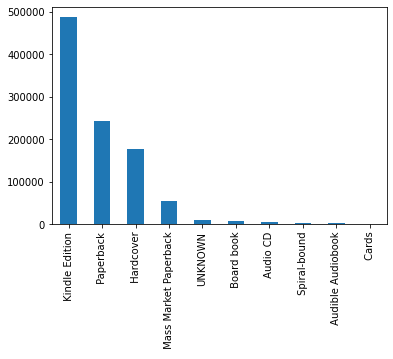

In [ ]:
format_counts[:10].plot.bar()

### 1.4.3 What is the most/least common format of the books?

Most Common format of books


In [ ]:
format_counts[format_counts==format_counts.max()]

Kindle Edition    487121
Name: style, dtype: Int64

Least Common format of books

In [ ]:
format_counts[format_counts==format_counts.min()]

Apparel                     1
Microfilm                   1
Board Game                  1
Wireless Phone Accessory    1
Baby Product                1
Workbook                    1
MP3 CD Library Binding      1
HD DVD                      1
Print on Demand             1
Name: style, dtype: Int64

### 1.4.4 What patterns can you find in your data?

#### Visualizations of contiguous features:

Review Text Length

**Inference**: 70% of the review text have length ~500

Text(0.5, 1.0, 'review Text Length Distribution')

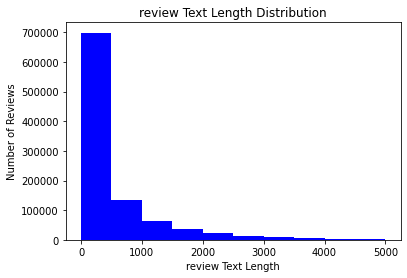

In [ ]:
plt.hist(df['reviewTextLength'], range=[0,5000], facecolor='blue', align='mid')
plt.xlabel('review Text Length')
plt.ylabel('Number of Reviews')
plt.title('review Text Length Distribution')

Summary text length

**Inference** :  50% of the summary text have length less than 25

Text(0.5, 1.0, 'Summary Text Length Distribution')

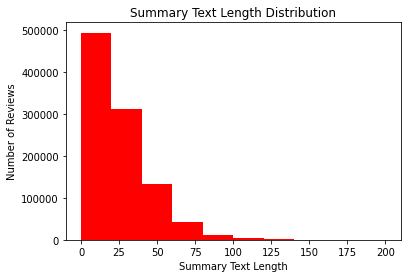

In [ ]:
plt.hist(df['summaryTextLength'], range=[0,200], facecolor='red', align='mid')

plt.xlabel('Summary Text Length')

plt.ylabel('Number of Reviews')

plt.title('Summary Text Length Distribution')

Summary Words

**Inference** :  ~60% of the Summary has word count less than 5

Text(0.5, 1.0, 'summary Words Distribution')

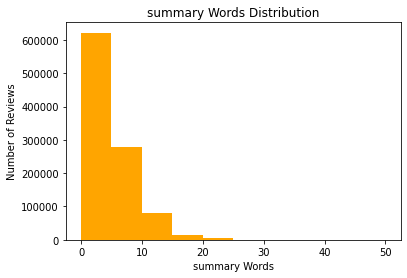

In [ ]:
plt.hist(df['summaryWords'], range=[0,50], facecolor='orange', align='mid')

plt.xlabel('summary Words')

plt.ylabel('Number of Reviews')

plt.title('summary Words Distribution')

Review Text Words

**Inference** : ~80% of the Review Text has word count less than 200

Text(0.5, 1.0, 'Review Text Words Distribution')

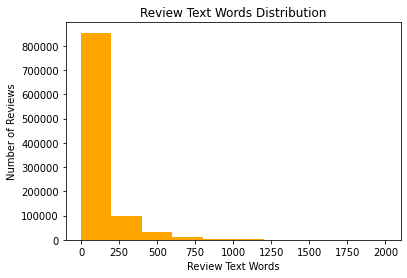

In [ ]:
plt.hist(df['reviewTextWords'], range=[0,2000], facecolor='orange', align='mid')

plt.xlabel('Review Text Words')

plt.ylabel('Number of Reviews')

plt.title('Review Text Words Distribution')

#### Visualizing Categorical features

Verified

**Inference** :  In the 1 million sample, 67.8% of the reviews are verified

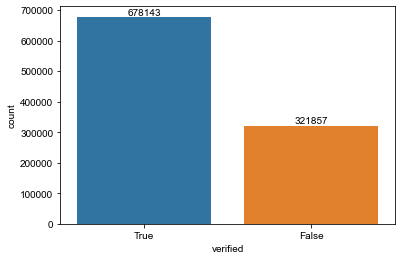

In [ ]:
import seaborn as sns
ax = sns.countplot(x=df['verified'],
                   order=df['verified'].value_counts(ascending=False).index);

abs_values = df['verified'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

Image

**Inference** :  99.85 % of the reviews do not have any image linked to it

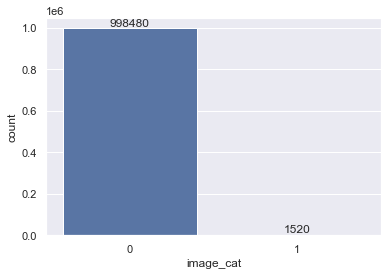

In [ ]:
ax = sns.countplot(x=df['image_cat'],
                   order=df['image_cat'].value_counts(ascending=False).index);

abs_values = df['image_cat'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

**Inference** : Most of the reviews are just plain text and do not have any alpha numeric values in them 

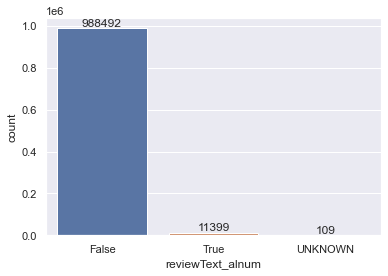

In [ ]:
ax = sns.countplot(x=df['reviewText_alnum'],
                   order=df['reviewText_alnum'].value_counts(ascending=False).index);

abs_values = df['reviewText_alnum'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

**Inference** : Most of the reviews are just plain text and do not have any alpha numeric values in them 

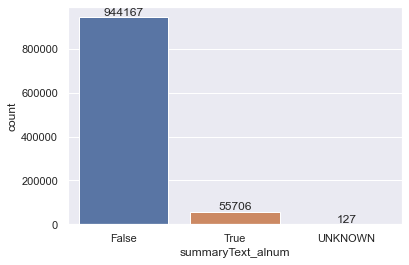

In [ ]:
ax = sns.countplot(x=df['summaryText_alnum'],
                   order=df['summaryText_alnum'].value_counts(ascending=False).index);

abs_values = df['summaryText_alnum'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

**Inference** :  ~61.5 % of the reviews have full 5 star rating. It implies that the reviews are mostly positive

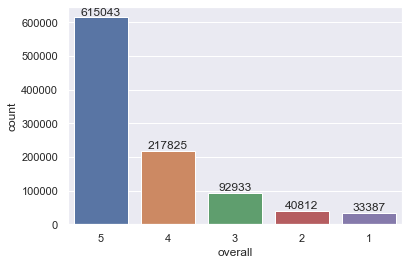

In [ ]:
ax = sns.countplot(x=df['overall'],
                   order=df['overall'].value_counts(ascending=False).index);

abs_values = df['overall'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

**Inference** : Major portion of teh reviews are posted for Kindle Edition of books!

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' Kindle Edition'),
  Text(1, 0, ' Paperback'),
  Text(2, 0, ' Hardcover'),
  Text(3, 0, ' Mass Market Paperback'),
  Text(4, 0, 'UNKNOWN')])

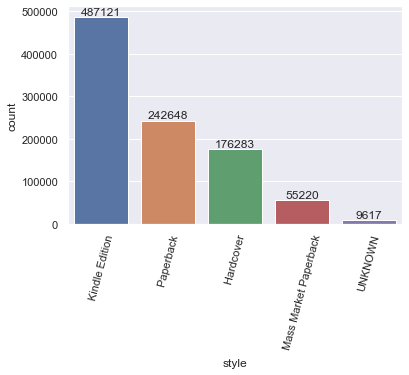

In [ ]:
ax = sns.countplot(x=df['style'],
                   order=df['style'].value_counts(ascending=False).nlargest(5).index);

abs_values = df['style'].value_counts(ascending=False).nlargest(5).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")
plt.xticks(rotation=75)

# 2 .Text normalization and feature engineering

### 2.1 Create a new column merging review summary and text.

Merging review summary and review text columns

In [ ]:
df['overallText'] =df["reviewText"]+df["summary"]

### 2.2 Stop words have already been removed in 1.4.1. We will be using the same feature for analysis

### 2.3 Remove numbers and other non-letter characters.
Removing non-alphanumeric values

In [ ]:
df['reviewText_clean'] = df['reviewText_without_stopwords'].apply(lambda x: ' '.join(filter(str.isalnum, x)))

In [ ]:
df['summary_clean'] = df['summary_without_stopwords'].apply(lambda x: ' '.join(filter(str.isalnum, x)))

In [ ]:
def remove_alphanum(text):
    words = []
    for word in text.split():
        if (word.isalnum()):
            words.append(word)
    return ' '.join(words)

In [ ]:
df['reviewText_clean'] = df['reviewText_without_stopwords'].apply(remove_alphanum)

In [ ]:
df['summary_clean'] = df['summary_without_stopwords'].apply(remove_alphanum)

In [ ]:
df["overallText_clean"] = df["reviewText_clean"] + df["summary_clean"]

### 2.4 Perform either lemmatization or stemming. Motivate your choice.

In [ ]:
import nltk

Download necessary nltk dataset for performing lemmatization

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/guryash96/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/guryash96/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

Create lemmatizer object

In [ ]:
lem = WordNetLemmatizer()

Perform lemmatization on the overall cleaned text

In [ ]:
df['lemmatized'] = df['overallText_clean'].map(lambda x: ' '.join([lem.lemmatize(y,"v") for y in x.split(' ')]))

Displaying dataset after performing lemmatization

In [ ]:
df['lemmatized'].head()

0    summarize try deal problem first place rather ...
1    agree another every home book partly partly am...
2    one grow also love bite cover great good copy ...
3                                      great bookgreat
4                                        lovefive star
Name: lemmatized, dtype: object

### 2.5. Convert the corpus into a bag-of-words TF-IDF weighted vector representation.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english', ngram_range=(1, 2))
tvec_weights = tvec.fit_transform(df['lemmatized'].dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
1566,series,0.016646
1042,look,0.014362
569,end,0.013515
1031,little,0.013482
1903,way,0.012886
1445,recommend,0.012810
1007,life,0.012529
1178,new,0.012240
1050,lot,0.012211
158,best,0.012116


In [ ]:
weights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   term    1972 non-null   object 
 1   weight  1972 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.9+ KB


# 3. Build a model to predict overall score

For model we just need 100k records , filtering out the records.

In [ ]:
df_100k = df.head(100000)

In [ ]:
df_100k.shape

(100000, 27)

Checking the variability of the target variable

In [ ]:
df['overall'].value_counts()

5    615043
4    217825
3     92933
2     40812
1     33387
Name: overall, dtype: Int64

#### Word Cloud for Overall Text

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [ ]:
final = ''
for review in df_100k['overallText']:
    tokens = str(review).lower().split()

    final += ' '.join(tokens) + ' '

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(final)

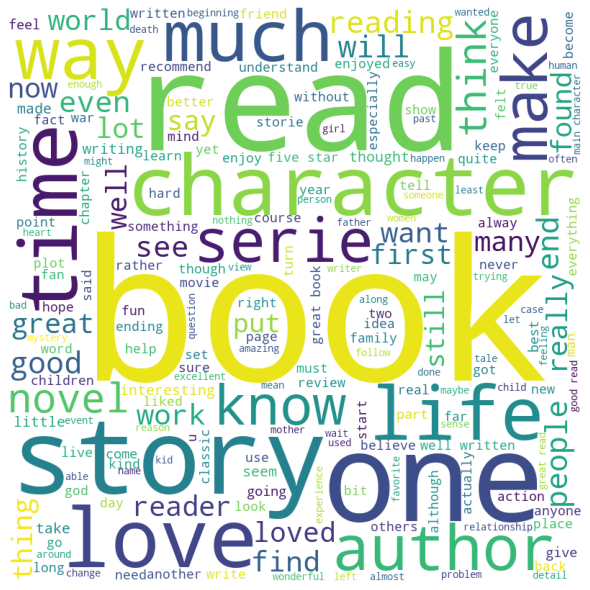

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## 3.1 Use score as the target variable. Explain what is the task you’re solving (e.g.,supervised x unsupervised, classification x regression x clustering or similarity matching x etc).
<p style="font-size: 18px">Since this data is labeled, we already know the target variable(Overall). Hence, this is a supervised learning problem. The target variable is a categorical variable (Ratings: 0,1,2,3,4,5). Hence, a classification model is the most suitable for this particular problem. We are performing classification to find out the overall rating of the review </p>

Defining X and y after feature selection
X is the lemmitized Overall column and y is the 'overall' column which is the target variable  

In [ ]:
X= df_100k['lemmatized']

In [ ]:
y =df_100k['overall']

Doing Test and Train split of 90% in Training data and 10% in test data

In [ ]:
# data split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

## 3.2 Use a feature selection method to select features to build the model


*   We evaluated the model with other features such as votes by combining it with the TFIDF version of the overall text. 
We observed that the accuracy of the model decreased when the model was evaluated with the non-textual feature
*   We used Reviever Name and Style (other textual features) to evaluate our model. But we are getting very low accuracy with those columns. And logically it makes sense to just consider only the columns which would contirbute to the overall rating of the review.


Hence, we are considering only the TFIDF version of the textual features (Review Summary + Review Text) to train our model.


## 3.3  Select the evaluation metric. Justify your choice.

There are plenty of evaluation metrics available for classification tasks.

**Accuracy Score**
The accuracy score is the ratio of correctly predicted output and the total number of predictions.

**Confusion Matrix**
The confusion matrix is used to visualize the performance of a classification model. The matrix makes it easy to see if the model is confusing two classes.


We are using the accuracy score for the evaluation of the model because we have used a random over sampler for balancing the data instances. Hence, the model will not train on a biased dataset.

## 3.4 and 3.5 Train and Evaluate Model + Hyperparameter Tuning

Linear Support Vector Machine is one of the best text classification algorithms.

We are using **Stochastic Gradient Descent** to train and evaluate our model

Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function.
To put it another way, it is employed in the discriminative learning of linear classifiers under convex loss functions, including SVM and logistic regression. Because the update to the coefficients is done for each training instance rather than at the end of examples, it has been successfully used to large-scale datasets.

Here the vectorization and tf-idf calculation is done inside by creating a pipeline and passing our model through that pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report


sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l1',alpha=1e-5, random_state=42, max_iter=5, tol=None)),
               ])

sgd.fit(X_train, y_train.astype(int))

y_pred = sgd.predict(X_test)

Accuracy Score

In [ ]:
print('accuracy %s' % accuracy_score(y_pred, y_test.astype(int)))

accuracy 0.6599


Classification Report/Confusion Matrix

In [ ]:
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           1       0.40      0.34      0.36       347
           2       0.26      0.11      0.15       456
           3       0.39      0.21      0.27       997
           4       0.49      0.24      0.32      2147
           5       0.72      0.94      0.82      6053

    accuracy                           0.66     10000
   macro avg       0.45      0.37      0.39     10000
weighted avg       0.61      0.66      0.61     10000



### Hyperparameter Tuning

Converting the textual feature to numbers using tf-idf representation

In [ ]:
 # Convert text to numbers using (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer  

tf_vectorizer = TfidfVectorizer()

In [ ]:
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

Convert the sparse matrix obtained from tf-idf to dataframe

In [ ]:
X_train_tf = pd.DataFrame.sparse.from_spmatrix(X_train_tf)

In [ ]:
X_test_tf = pd.DataFrame.sparse.from_spmatrix(X_test_tf)

We are testing different values of learning rate(alpha) to find out the best model which has the highest testing accuracy. The learning rate hyperparameter controls the speed at which the model learns. 
A higher value of learning rate could overshoot the gradient descent, while a low-value learning rate could slow down the learning significantly. 
We have tried different values of learning rate to evaluate the model with the highest testing accuracy.



In [ ]:
alpha_values = [0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1]
acc_test = []
max_accuracy = 0
alpha_optimum = 0
for alpha in alpha_values:
    model_sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=alpha, random_state=42, max_iter=5, tol=None)
    model_sgd.fit(X_train_tf, y_train.astype(int))
    prediction_test = model_sgd.predict(X_test_tf)
    accuracy_score_val = round(accuracy_score(y_test.astype(int), prediction_test.astype(int))*100, 2)
    acc_test.append(accuracy_score_val)
    if max_accuracy < accuracy_score_val:
        max_accuracy=accuracy_score_val
        alpha_optimum=alpha



Different accuracy scores by using set of hyperparameters

In [ ]:
acc_test

[63.2, 66.96, 64.92, 61.09, 60.53, 60.53]

Max Accuracy with the best set of hyperparameters. (66.96 %)

In [ ]:
max_accuracy

66.96

Optimum value of hyerparameters

In [ ]:
alpha_optimum

1e-05

## 3.6 How do you make sure not to overfit?

Since we are using a stochastic gradient descent algorithm for training our model, we have an option to use regularization to avoid the overfitting of the model.
There are two types of regularization: L1 and L2. The L1 regularization tries to estimate the median of the data while L2 regularization tries to estimate the mean of the data.
Both types of regularization add a penalty term to the cost function. Hence, the learnable weights are kept in check by not allowing them to go beyond certain values.
The regularization method reduces the training accuracy but avoids the overfitting of the model. It thus generalizes well as compared to the model which is not regularized.

## 3.7 Plot a visualization of the learning process or the learned information of the model.

We can observe from the learning curve that the performance of the model with test data is very much similar to the training data

In [ ]:
from mlxtend.plotting import plot_learning_curves

([0.6043333333333333,
  0.6068888888888889,
  0.6081851851851852,
  0.6066388888888888,
  0.6060222222222222,
  0.6045925925925926,
  0.6055555555555555,
  0.6052638888888889,
  0.6054197530864197,
  0.6056333333333334],
 [0.6053,
  0.6053,
  0.6053,
  0.6053,
  0.6053,
  0.6053,
  0.6053,
  0.6053,
  0.6053,
  0.6053])

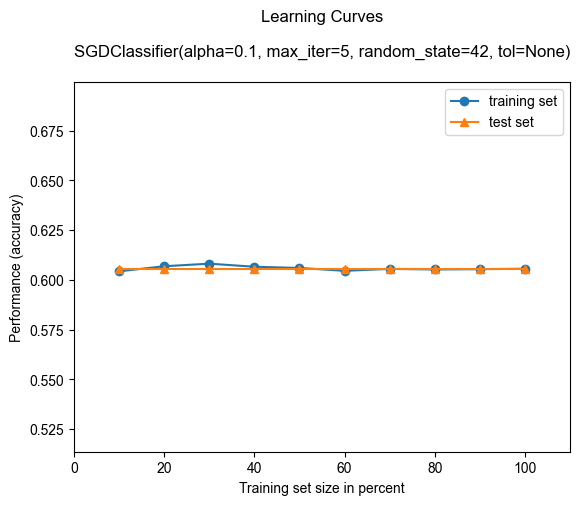

In [ ]:
plot_learning_curves(X_train_tf, y_train.astype(int), X_test_tf, y_test.astype(int),model_sgd , scoring='accuracy')

# 4 . Part of Speech Tagging

### Prerequisites

In [ ]:
from nltk import word_tokenize, pos_tag

Download data required for tagging sentences

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/guryash96/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/guryash96/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Raw Data POS Tagging

Tokenize the raw data(Overall Text) before preprocessing

In [ ]:
df_100k['tokenized_raw'] = df_100k['overallText'].apply(word_tokenize)

Perform part of speech tagging on the tokenized data from the previous step

In [ ]:
df_100k['pos_tagged_raw'] = df_100k['tokenized_raw'].apply(pos_tag)

Displaying first 10 tagged data 

In [ ]:
df_100k['pos_tagged_raw'].head(10)

0    [(to, TO), (summarize, VB), (the, DT), (story,...
1    [(i, NNS), (agree, VBP), (with, IN), (another,...
2    [(one, CD), (of, IN), (my, PRP$), (daughters, ...
3    [(``, ``), (u, JJ), ('', ''), (is, VBZ), (for,...
4             [(love, VB), (itfive, JJ), (stars, NNS)]
5    [(my, PRP$), (girls, NNS), (loved, VBD), (this...
6    [(this, DT), (is, VBZ), (one, CD), (of, IN), (...
7    [(i, NN), (chose, VBD), (this, DT), (rating, N...
8    [(hillerman, NN), (has, VBZ), (a, DT), (poetic...
9    [(good, JJ), (background, NN), (., .), (intere...
Name: pos_tagged_raw, dtype: object

### Post-Processing POS Tagging

Tokenize the processed data(Overall Text) before preprocessing

In [ ]:
df_100k['tokenized_clean'] = df_100k['overallText_clean'].apply(word_tokenize)

Perform part of speech tagging on the tokenized data from the previous step

In [ ]:
df_100k['pos_tagged_clean'] = df_100k['tokenized_clean'].apply(pos_tag)

Displaying first 10 tagged data

In [ ]:
df_100k['pos_tagged_clean'].head(10)

0    [(summarize, VB), (trying, VBG), (deal, NN), (...
1    [(agree, RB), (another, DT), (every, DT), (hom...
2    [(one, CD), (growing, VBG), (also, RB), (loved...
3                       [(great, JJ), (bookgreat, NN)]
4                       [(lovefive, JJ), (stars, NNS)]
5    [(girls, NNS), (loved, VBD), (book, NN), (todd...
6    [(one, CD), (books, NNS), (purports, VBZ), (le...
7    [(chose, NN), (rating, NN), (could, MD), (cons...
8    [(hillerman, JJ), (poetic, JJ), (way, NN), (de...
9    [(good, JJ), (interesting, JJ), (premise, NN),...
Name: pos_tagged_clean, dtype: object

Create a set containing encodings for nouns

In [ ]:
nouns_types = {"NNP", "NNS", "NN", "NNPS"}

Create text containing only nouns.

1. Get each tagged sentence containing list of tuples(word, tag).
2. Iterate through each tagged tuple.
3. Skip the tags other than nouns.
4. Add the word with the noun tags using list comprehension
5. Finally, join all the nouns with a space delimiter

In [ ]:
df_100k['clean_noun_text'] = df_100k['pos_tagged_clean'].apply(lambda pos_tags: " ".join([pos_tag[0] for pos_tag in pos_tags if pos_tag[1] in nouns_types]))

Displaying text which only includes nouns

In [ ]:
df_100k['clean_noun_text'].head(1000)

0      deal problem place solutions problems lions st...
1      home book illustrations joan book people intro...
2      copy collection illustrations selections price...
3                                              bookgreat
4                                                  stars
                             ...                        
995    story love talks people relationship character...
996                                 book graduation gift
997                 book read way absorb fullyinsightful
998                                        history stars
999    turn glad book series book surprises historybo...
Name: clean_noun_text, Length: 1000, dtype: object

Distribution of Target Variable "Overall"

In [ ]:
df_100k["overall"].value_counts()

5    60560
4    21645
3     9789
2     4432
1     3574
Name: overall, dtype: Int64

#### Word Cloud for Overall Text without Nouns

In [ ]:
final = ''
for review in df_100k['clean_noun_text']:
    tokens = str(review).lower().split()

    final += ' '.join(tokens) + ' '

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(final)


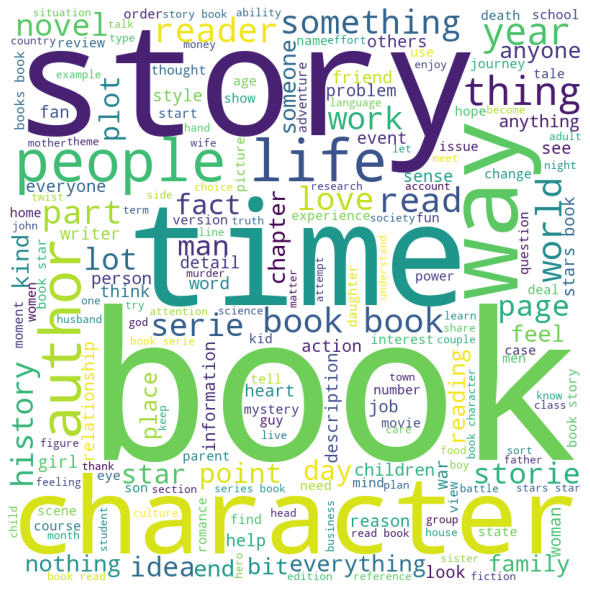

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**FEATURE SELECTION**
*   We evaluated the model with other features such as votes by combining it with the TFIDF version of the overall text. 
We observed that the accuracy of the model decreased when the model was evaluated with the non-textual feature
*   We used Reviever Name and Style (other textual features) to evaluate our model. But we are getting very low accuracy with those columns. And logically it makes sense to just consider only the columns which would contirbute to the overall rating of the review.


Hence, we are considering only the TFIDF version of the textual features (Review Summary + Review Text) to train our model.


Dividing teh dataframe into X (input) and y( target) to be fed into the model

In [ ]:
X_noun = df_100k['clean_noun_text']

In [ ]:
y_noun =df_100k['overall']

Split the datset into 90% training and 10 % testing to get better results

In [ ]:
# data split 
from sklearn.model_selection import train_test_split 
X_train_noun, X_test_noun, y_train_noun, y_test_noun = train_test_split(X_noun, y_noun, test_size = 0.1)

Running the same Model (SGD Classifier) with the new data which contains only nouns

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report


sgd_noun = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

sgd_noun.fit(X_train_noun, y_train_noun.astype(int))


y_pred_noun = sgd_noun.predict(X_test_noun)

Accuarcy Score of the model with noun data is **60.85 %**

In [ ]:
print('accuracy %s' % accuracy_score(y_pred_noun, y_test_noun.astype(int)))

accuracy 0.6085


Classification Report of the model with noun data

In [ ]:
print(classification_report(y_test_noun.astype(int), y_pred_noun.astype(int)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       354
           2       0.00      0.00      0.00       432
           3       0.00      0.00      0.00       983
           4       0.00      0.00      0.00      2146
           5       0.61      1.00      0.76      6085

    accuracy                           0.61     10000
   macro avg       0.12      0.20      0.15     10000
weighted avg       0.37      0.61      0.46     10000



Converting the textual feature to numbers using tf-idf representation

In [ ]:
# Convert text to numbers using (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer  

tf_vectorizer = TfidfVectorizer()

X_train_noun_tf = tf_vectorizer.fit_transform(X_train_noun)
X_test_noun_tf = tf_vectorizer.transform(X_test_noun)

Converting sparse matrix obtained from tf-idf to dataframe

In [ ]:
X_train_noun_tf = pd.DataFrame.sparse.from_spmatrix(X_train_noun_tf)

X_test_noun_tf = pd.DataFrame.sparse.from_spmatrix(X_test_noun_tf)

We are testing different values of learning rate(alpha) to find out the best model which has the highest testing accuracy. The learning rate hyperparameter controls the speed at which the model learns. 
A higher value of learning rate could overshoot the gradient descent, while a low-value learning rate could slow down the learning significantly. 
We have tried different values of learning rate to evaluate the model with the highest testing accuracy.


In [ ]:
from sklearn.metrics import accuracy_score

alpha_values = [0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1]
acc_test_noun = []
max_accuracy_noun = 0
alpha_optimum_noun = 0
for alpha in alpha_values:
    model_sgd_noun = SGDClassifier(loss='hinge', penalty='l2',alpha=alpha, random_state=42, max_iter=5, tol=None)
    model_sgd_noun.fit(X_train_noun_tf, y_train.astype(int))
    prediction_test = model_sgd_noun.predict(X_test_noun_tf)
    accuracy_score_val_noun = round(accuracy_score(y_test.astype(int), prediction_test.astype(int))*100, 2)
    acc_test_noun.append(accuracy_score_val_noun)
    if max_accuracy_noun < accuracy_score_val_noun:
        max_accuracy_noun=accuracy_score_val_noun
        alpha_optimum_noun=alpha

Results of Accuracy Test with data containing only nouns


In [ ]:
acc_test_noun

[50.2, 59.88, 60.53, 60.53, 60.53, 60.53]

Max Accuracy score with optimal hyperparameters is** 60.53%**

In [ ]:
max_accuracy_noun

60.53

Optimum value of hyperparameter

In [ ]:
alpha_optimum_noun

0.0001

**Learning Curve**

We can observe from the learning curve that the performance of the model with test data is very much similar to the training data

([0.6043333333333333,
  0.6068888888888889,
  0.6081851851851852,
  0.6066388888888888,
  0.6060222222222222,
  0.6045925925925926,
  0.6055555555555555,
  0.6052638888888889,
  0.6054197530864197,
  0.6056333333333334],
 [0.6053,
  0.6053,
  0.6053,
  0.6053,
  0.6053,
  0.6053,
  0.6053,
  0.6053,
  0.6053,
  0.6053])

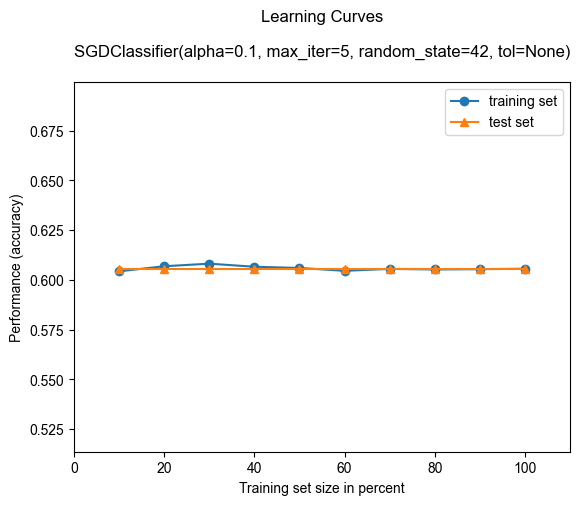

In [ ]:
 from mlxtend.plotting import plot_learning_curves

plot_learning_curves(X_train_noun_tf, y_train.astype(int), X_test_noun_tf, y_test.astype(int),model_sgd_noun , scoring='accuracy')

### Compare the performance with what you received in Q3 and Q4 with a statistical significance test. Discuss your findings.

Cross Validation Test

We have performed cross validation test for comparing the performance of the model. We have done 5 fold cross validation to check the significance of the model. From the box plot we can see that the accuarcy of the model before noun is around ~62 % and the 

In [ ]:
# # ### Cross Validation of SGD CLassifier on Lemmatized data

from sklearn.model_selection import cross_val_score

validation_sgd= cross_val_score(model_sgd, X_tf, y.astype(int), cv=5)

In [ ]:
#### Cross Validation of SGD CLassifier on Lemmatized data with nouns

from sklearn.model_selection import cross_val_score

validation_sgd_noun =cross_val_score(model_sgd_noun, X_noun_tf, y_noun.astype(int), cv=5)

([<matplotlib.axis.XTick at 0x56db840a0>,
 [Text(0, 0, 'sgb_classifier'), Text(1, 0, 'sgb_classifier_nouns')])

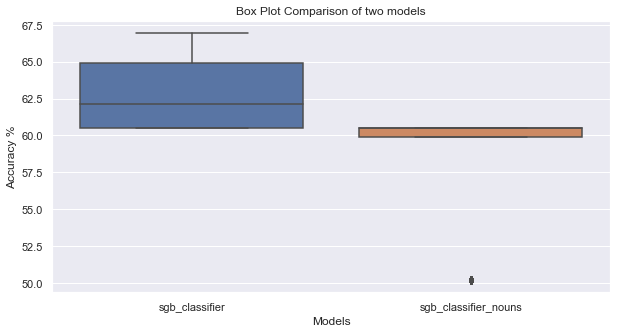

In [ ]:
### Box plot Comparison of Models

all_arr = [(validation_sgd)*100, (validation_sgd_noun)*100]
fig = plt.figure(figsize =(10, 5))
ax=sns.boxplot(data=all_arr)
ax.set_title('Box Plot Comparison of two models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy %')
plt.xticks([0, 1], ['sgb_classifier','sgb_classifier_nouns'])

# References 

[1] "Dealing With Missing Values in Python - Analytics Vidhya", Analytics Vidhya, 2022. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/. [Accessed: 21- Jul- 2022]

[2] "sklearn.preprocessing.LabelEncoder", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. [Accessed: 20- Jul- 2022]

[3] "matplotlib.pyplot.scatter — Matplotlib 3.5.2 documentation", Matplotlib.org, 2022. [Online]. Available: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html. [Accessed: 19- Jul- 2022]

[4] "sklearn.model_selection.train_test_split", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html. [Accessed: 22- Jul- 2022]

[5] Dropi . [Online]. Available: https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf?utm_content=buffer79b43&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer. [Accessed: 22- Jul- 2022].

[6] D. overfit? and A. Grigorev, "Do Random Forest overfit?", Data Science Stack Exchange, 2022. [Online]. Available: https://datascience.stackexchange.com/questions/1028/do-random-forest-overfit. [Accessed: 22- Jul- 2022].


[7]"Removing stop words with NLTK in Python - GeeksforGeeks", GeeksforGeeks, 2022. [Online]. Available: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/. [Accessed: 23- Jul- 2022].


[8] "Evaluation Metrics For Classification Model | Classification Model Metrics", Analytics Vidhya, 2022. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/. [Accessed: 19- Jul- 2022].

[9] J. Brownlee, "Recursive Feature Elimination (RFE) for Feature Selection in Python", Machine Learning Mastery, 2022. [Online]. Available: https://machinelearningmastery.com/rfe-feature-selection-in-python/. [Accessed: 08- Jul- 2022].

[10] Stemmming vs Lemmitization. [Online]. Available: https://www.baeldung.com/cs/stemming-vs-lemmatization. [Accessed: 23- Jul- 2022].

[11]"Multi-Class Text Classification Model Comparison and Selection", Medium, 2022. [Online]. Available: https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568#:~:text=Linear%20Support%20Vector%20Machine%20is,the%20best%20text%20classification%20algorithms. [Accessed: 24- Jul- 2022].

[12]"5. Categorizing and Tagging Words", Nltk.org, 2022. [Online]. Available: https://www.nltk.org/book/ch05.html. [Accessed: 24- Jul- 2022]

[13] A.Mahale, H.Lakhani, "Assignment 1." Dalhousie University, [Online], 2022. [Accessed 19-Jul-2022]

[14] G.Dhall, B.Jindal, "Assignment 1." Dalhousie University, [Online], 2022. [Accessed 20-Jul-2022]

[15] G.Dhall, A.Mahale, "Assignment 2." Dalhousie University, [Online], 2022. [Accessed 23-Jul-2022]

[16] M.Taranukhin, "Tutorial- Text Mining" Dalhousie University, [Online], 2022. [Accessed 22-Jul-2022]

[17] M.Taranukhin, "Tutorial- 1" Dalhousie University, [Online], 2022. [Accessed 22-Jul-2022]

[18]"Generating Word Cloud in Python - GeeksforGeeks", GeeksforGeeks, 2022. [Online]. Available: https://www.geeksforgeeks.org/generating-word-cloud-python/. [Accessed: 24- Jul- 2022]